In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pB2T8buU3Pme9VXkojyXMKRnQlC97Gz-pz7obiE_u2sC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-ng9nvxfm87wx4b'
object_key = 'Admission prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,10th Score,12th Score,Colaborate,Sports & extra,Clubs,Research,Chance of Admit
0,527,198,4,4.5,4.5,1,0.92
1,514,147,4,4.0,4.5,1,0.76
2,456,144,3,3.0,3.5,1,0.72
3,462,190,3,3.5,2.5,1,0.80
4,454,143,2,2.0,3.0,0,0.65


In [3]:
df

,10th Score,12th Score,Colaborate,Sports & extra,Clubs,Research,Chance of Admit
0,527,198,4,4.5,4.5,1,0.92
1,514,147,4,4.0,4.5,1,0.76
2,456,144,3,3.0,3.5,1,0.72
3,462,190,3,3.5,2.5,1,0.80
4,454,143,2,2.0,3.0,0,0.65
...,...,...,...,...,...,...,...
403,453,147,1,2.0,3.0,1,0.31
404,453,147,2,1.0,2.0,0,0.32
405,453,147,3,1.0,1.0,0,0.33
406,453,147,1,1.0,0.0,1,0.40


## Analyzing the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   10th Score        408 non-null    int64  
 1   12th Score        408 non-null    int64  
 2   Colaborate        408 non-null    int64  
 3   Sports & extra    408 non-null    float64
 4   Clubs             408 non-null    float64
 5   Research          408 non-null    int64  
 6   Chance of Admit   408 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 22.4 KB


In [5]:
df.corr()

,10th Score,12th Score,Colaborate,Sports & extra,Clubs,Research,Chance of Admit
10th Score,1.000000,0.690273,0.605586,0.523711,0.445936,0.508831,0.665770
12th Score,0.690273,1.000000,0.613050,0.537487,0.464770,0.407168,0.670492
Colaborate,0.605586,0.613050,1.000000,0.725659,0.658351,0.424274,0.696008
Sports & extra,0.523711,0.537487,0.725659,1.000000,0.749951,0.413682,0.696814
Clubs,0.445936,0.464770,0.658351,0.749951,1.000000,0.380859,0.682286
Research,0.508831,0.407168,0.424274,0.413682,0.380859,1.000000,0.501719
Chance of Admit,0.665770,0.670492,0.696008,0.696814,0.682286,0.501719,1.000000


In [6]:
df.describe()

,10th Score,12th Score,Colaborate,Sports & extra,Clubs,Research,Chance of Admit
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,472.073529,162.946078,3.102941,3.377451,3.428922,0.561275,0.718309
std,34.211935,28.315388,1.147239,1.040781,0.944971,0.496840,0.150780
min,358.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.300000
25%,452.000000,145.000000,2.000000,2.500000,3.000000,0.000000,0.630000
50%,456.500000,147.000000,3.000000,3.500000,3.500000,1.000000,0.730000
75%,515.000000,192.000000,4.000000,4.000000,4.000000,1.000000,0.822500
max,540.000000,200.000000,5.000000,5.000000,5.000000,1.000000,1.000000


## Handling missing values

In [7]:
df.isnull().sum()

10th Score          0
12th Score          0
Colaborate          0
Sports & extra      0
Clubs               0
Research            0
Chance of Admit     0
dtype: int64

## data visualization

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='12th Score'>

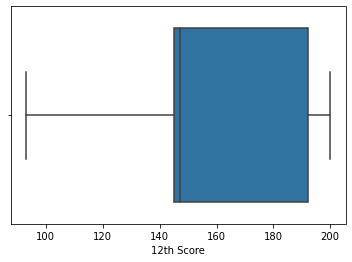

In [8]:
sns.boxplot(df['12th Score'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='10th Score'>

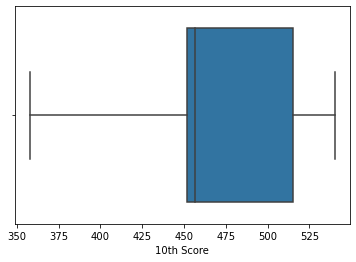

In [9]:
sns.boxplot(df['10th Score'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='10th Score', ylabel='12th Score'>

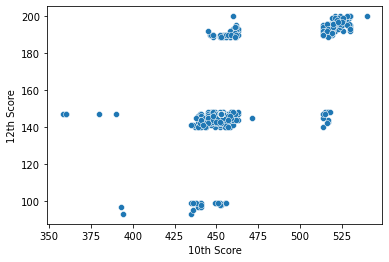

In [10]:
sns.scatterplot(df['10th Score'],df['12th Score'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='12th Score', ylabel='Density'>

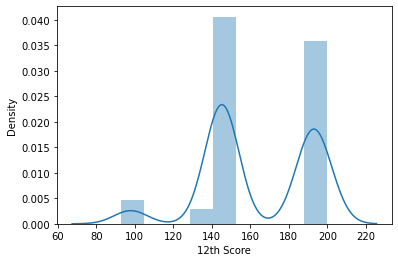

In [11]:
sns.distplot(df['12th Score'])

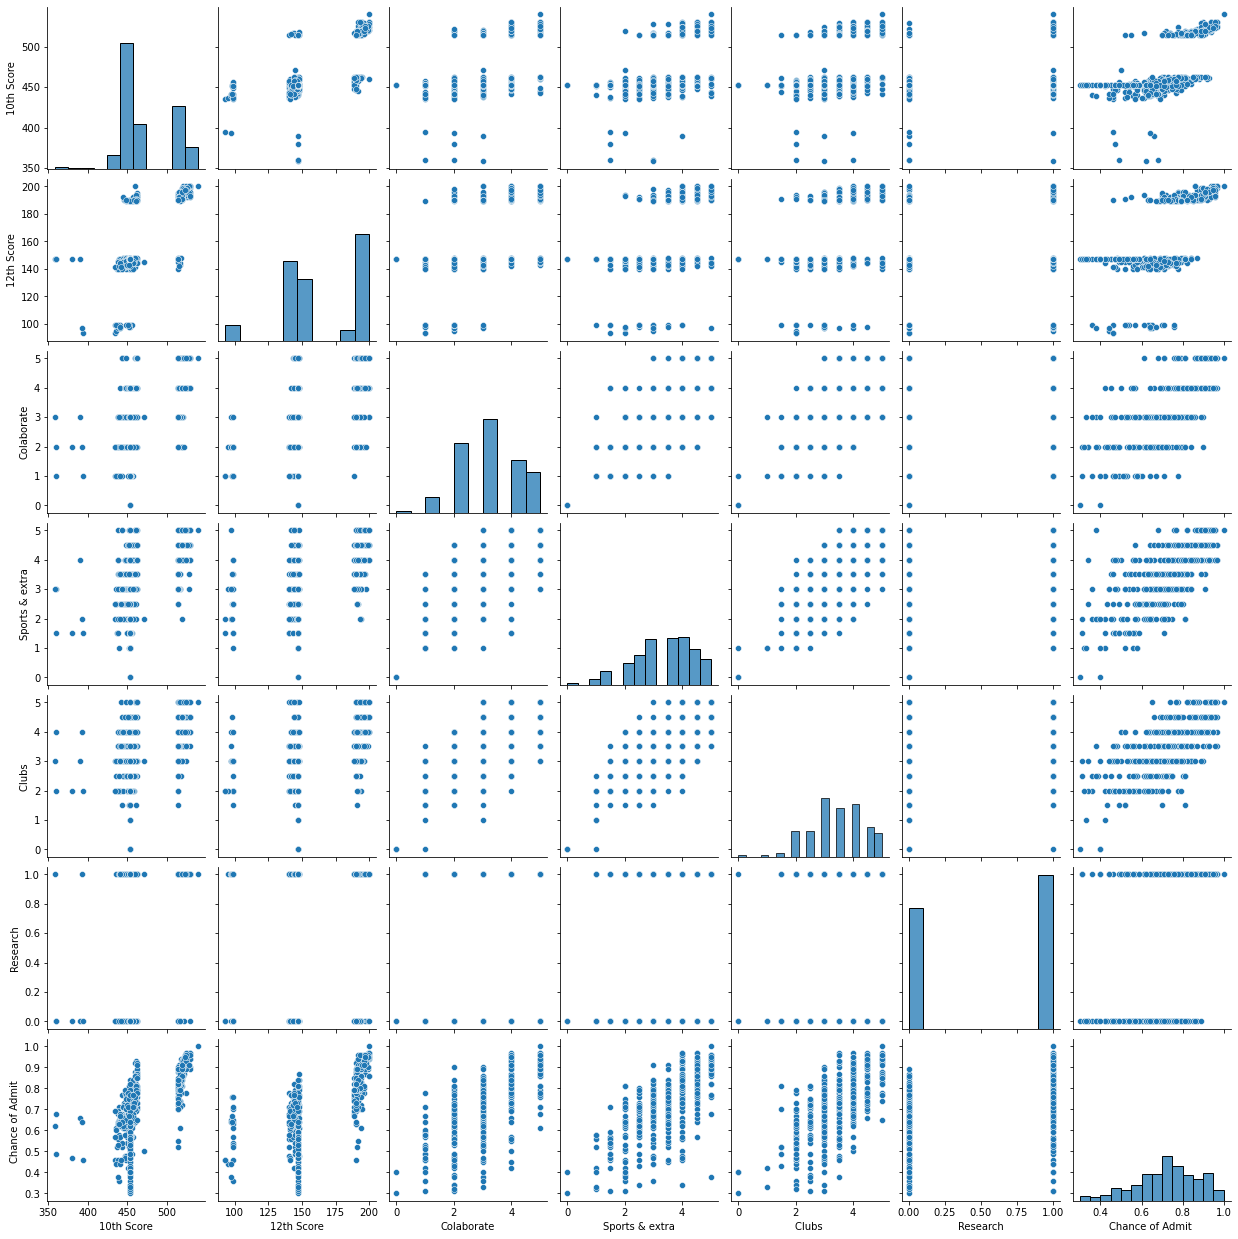

In [12]:
sns.pairplot(df)

## split x and y

In [13]:
y = df.iloc[:,6:]

In [14]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
403,0.31
404,0.32
405,0.33
406,0.40


In [15]:
x = df.iloc[:,:6]

In [16]:
x

,10th Score,12th Score,Colaborate,Sports & extra,Clubs,Research
0,527,198,4,4.5,4.5,1
1,514,147,4,4.0,4.5,1
2,456,144,3,3.0,3.5,1
3,462,190,3,3.5,2.5,1
4,454,143,2,2.0,3.0,0
...,...,...,...,...,...,...
403,453,147,1,2.0,3.0,1
404,453,147,2,1.0,2.0,0
405,453,147,3,1.0,1.0,0
406,453,147,1,1.0,0.0,1


<AxesSubplot:xlabel='10th Score', ylabel='Count'>

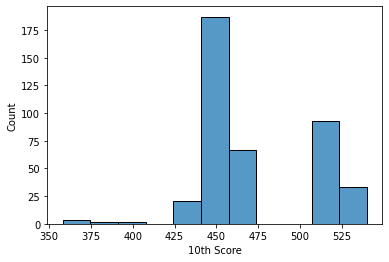

In [17]:
sns.histplot(df['10th Score'])

## scaling

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [19]:
x_scaled

array([[ 1.607448  ,  1.23950124,  0.78288815,  1.07988838,  1.13484293,
         0.88411503],
       [ 1.22699712, -0.56385087,  0.78288815,  0.59889006,  1.13484293,
         0.88411503],
       [-0.47039911, -0.6699304 , -0.08983962, -0.36310657,  0.07530994,
         0.88411503],
       ...,
       [-0.55819546, -0.56385087, -0.08983962, -2.28709984, -2.57352252,
        -1.13107454],
       [-0.55819546, -0.56385087, -1.83529517, -2.28709984, -3.6330555 ,
         0.88411503],
       [-0.55819546, -0.56385087, -0.08983962, -1.32510321, -0.45445655,
         0.88411503]])

y.value_counts()

## train and test

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=2)

In [21]:
x_train.shape

(306, 6)

In [22]:
x_test.shape

(102, 6)

In [23]:
y_train.shape

(306, 1)

In [24]:
y_test.shape

(102, 1)

## build a model

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(x,y)

LinearRegression()

In [27]:
p = lr.predict(x_test)
p

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-0.08120757],
       [-0.09145891],
       [-0.36871887],
       [-0.02705838],
       [-0.07184847],
       [-0.25258995],
       [-0.27025268],
       [-0.01607445],
       [-0.25299428],
       [-0.05319854],
       [-0.171402  ],
       [-0.00299478],
       [-0.01357742],
       [-0.21011811],
       [-0.14307531],
       [-0.02422947],
       [-0.31919572],
       [-0.00296951],
       [-0.22825039],
       [-0.09059413],
       [-0.14620107],
       [-0.03591568],
       [-0.15126896],
       [-0.2373129 ],
       [-0.18971709],
       [-0.23887413],
       [-0.17413376],
       [-0.1497047 ],
       [-0.12774379],
       [-0.29523961],
       [-0.17726054],
       [-0.11035049],
       [-0.2875994 ],
       [-0.14319223],
       [-0.03571017],
       [-0.15877696],
       [-0.21408332],
       [-0.22655673],
       [-0.02559215],
       [-0.09116814],
       [-0.21785744],
       [-0.22656921],
       [-0.19760079],
       [-0.06910177],
       [-0.11502372],
       [-0

In [28]:
pred = lr.predict([[500,200,5,5,5,1]])
pred

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.92995967]])

## model evaluation

In [29]:
from sklearn.metrics import r2_score
r2_score(p,y_test)

-101.92639797580367

## deploying the ML model

In [30]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [31]:
from ibm_watson_machine_learning import APIClient

In [32]:
wml_credentials = {
    "apikey":"JBX6vwRnxH6V4GWtAvMTh35BEf-Up0FQ_A5GV4XWj3Cs",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [33]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------  ------------------------
ID                                    NAME         CREATED
1a1ed831-8105-44ad-b8b4-1fe6965b6b4a  UAEP_DEPLOY  2022-11-17T18:00:23.796Z
------------------------------------  -----------  ------------------------


In [34]:
space_id = "1a1ed831-8105-44ad-b8b4-1fe6965b6b4a"

In [35]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [36]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [37]:
model_name = "Predmodel"
deployment_name = "model_deploy"
model = lr

In [38]:
software_spec_uid = wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [39]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME:model_name,
    wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [40]:
model_details = wml_client.repository.store_model(
    model = model,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train
)

In [41]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-17T19:33:50.898Z',
  'id': 'a9a9d044-6993-49d3-af43-d31c187609b3',
  'modified_at': '2022-11-17T19:33:53.945Z',
  'name': 'Predmodel',
  'owner': 'IBMid-665002OLFD',
  'resource_key': '2655948e-7e51-4c3d-83e2-d5f4a860d4bc',
  'space_id': '1a1ed831-8105-44ad-b8b4-1fe6965b6b4a'},
 'system': {'warnings': []}}